<a href="https://colab.research.google.com/github/hhaemin/data_deeplearning/blob/main/Numpy%E1%84%85%E1%85%A9_FFN_%E1%84%86%E1%85%A1%E1%86%AB%E1%84%83%E1%85%B3%E1%86%AF%E1%84%80%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
learning_rate = 0.001 #아주 기본적인 형식
bias = 0.7 #매우 무작위적인 변수
epochs = 50 
final_epoch_loss = []

In [3]:
random_generator = np.random.default_rng() #입력, 출력 및 가중치와 같은 일부 임의 기능을 생성하는데 사용

def generate_data(n_features, n_values):
    weights = random_generator.random((1, n_values))[0] #n_values : 각 데이터 포인트에 얼마나 많은 피쳐가 있어야 하는지를 의미
    features = random_generator.random((n_features, n_values))
    targets = np.random.choice([0,1], n_features) #n_features : 데이터에 얼마나 많은 데이터 포인트 또는 샘플이 있어야 하는지를 의미
    data = pd.DataFrame(features, columns=["n1", "n2", "n3", "n4"])
    data["target"] = targets
    return data, weights

In [5]:
def get_weighted_sum(features, weights, bias): #가중치의 합계
    return np.dot(features, weights) + bias

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
def cross_entropy_loss(target, prediction):
    return -(target*np.log10(prediction) + (1-target)*np.log10(1-prediction))

In [8]:
#각 반복 후에 loss에 따라 bias와 가중치를 업데이트해야 합니다.
def update_weights(weights, learning_rate, target, prediction, feature):
    new_weights = []
    for input_x, old_weight in zip(feature, weights):
        new_weight = old_weight + learning_rate*(target - prediction)*input_x
        new_weights.append(new_weight)
    return new_weights

def update_bias(bias, learning_rate, target, prediction):
    return bias + learning_rate*(target-prediction)

In [10]:
data, weights = generate_data(500,4)

def train_model(data, weights, bias, learning_rate, epochs):
    for epoch in range(epochs):
        individual_loss = []
        for i in range(0, len(data)):
            feature = data.loc[i][:-1]
            # ["n1", "n2", "n3", "n4"] ... features
            target = data.loc[i][-1] #.... "target"
            w_sum = get_weighted_sum(features=feature, weights=weights, bias=bias)
            prediction = sigmoid(w_sum)
            loss = cross_entropy_loss(target, prediction)
            individual_loss.append(loss) #매 epoch가 지나면 발생하는 loss를 의미
            weights = update_weights(weights, learning_rate, target, prediction, feature)
            bias = update_bias(bias, learning_rate, target, prediction)
        average_loss = sum(individual_loss)/len(individual_loss) 
        final_epoch_loss.append(average_loss)
        print(f"******************************** Epoch: {epoch} , Loss:  {average_loss}")

In [14]:
data

,n1,n2,n3,n4,target
0,0.304884,0.856867,0.567777,0.775876,1
1,0.038482,0.446371,0.538764,0.737608,1
2,0.090996,0.236830,0.494725,0.693680,0
3,0.627957,0.860822,0.430142,0.390540,0
4,0.529902,0.283847,0.823363,0.546941,0
...,...,...,...,...,...
495,0.196773,0.881927,0.257162,0.697437,1
496,0.147659,0.393737,0.696006,0.744848,0
497,0.477117,0.366646,0.125456,0.281652,0
498,0.375052,0.561252,0.762315,0.763593,0


In [11]:
weights

array([0.16412844, 0.00208141, 0.47481806, 0.22159543])

In [12]:
train_model(data, weights, bias, learning_rate, epochs)

******************************** Epoch: 0 , Loss:  0.36455130384274315
******************************** Epoch: 1 , Loss:  0.34179092882650114
******************************** Epoch: 2 , Loss:  0.3268359854661497
******************************** Epoch: 3 , Loss:  0.31727911258492203
******************************** Epoch: 4 , Loss:  0.31127748921372844
******************************** Epoch: 5 , Loss:  0.30754444004415804
******************************** Epoch: 6 , Loss:  0.30523117388148313
******************************** Epoch: 7 , Loss:  0.3037965868158436
******************************** Epoch: 8 , Loss:  0.30290256924055053
******************************** Epoch: 9 , Loss:  0.30234023660028747
******************************** Epoch: 10 , Loss:  0.3019813239283037
******************************** Epoch: 11 , Loss:  0.3017473021525487
******************************** Epoch: 12 , Loss:  0.3015901428271257
******************************** Epoch: 13 , Loss:  0.30148046771125075
*******

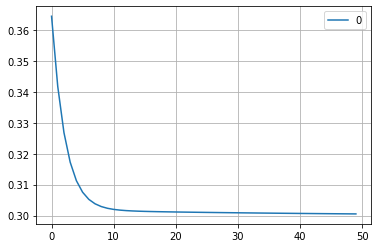

In [13]:
df = pd.DataFrame(final_epoch_loss)
df_plot = df.plot(kind="line", grid=True).get_figure()